In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing, model_selection, metrics, ensemble
import lightgbm as lgb

# Question 1

## 1a)

In [2]:
data = pd.read_csv("train_dataset.csv")
print(data.shape)
data.head()

(51088, 34)


,RT13Id,IsBadBuy,PurchDate,Auction,PaintingYear,PaintingAge,Artist,PaintingName,Trim,SubType,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,PaintingBCost,IsOnlineSale,WarrantyCost
0,21003,0,4/21/2010,Christie's,2007,3,Cai Jin,TUCSON T2 T7,GLS,4D other,...,13641.0,14951.0,NaN,NaN,8655,75236,TX,8160.0,0,920
1,57560,0,4/1/2009,Sotheby's,2004,5,Grandma Moses,Moses T6 3.9L T6 E,Bas,2D Landscape,...,6122.0,7474.0,NaN,NaN,22808,71119,LA,6870.0,0,853
2,29868,0,3/31/2010,Christie's,2008,2,Frida Kahlo,AURA T6,XE,4D Genre XE,...,13509.0,15918.0,NaN,NaN,20928,32824,FL,8680.0,0,1373
3,64473,1,6/16/2010,Sotheby's,2003,7,Leonardo Da Vinci,MALIBU T6,Bas,4D Genre,...,5243.0,6541.0,NaN,NaN,21053,85226,AZ,4830.0,0,2508
4,68666,0,11/4/2010,Sotheby's,2007,3,Leonardo Da Vinci,COBALT,LS,4D Genre LS,...,8228.0,9300.0,NaN,NaN,22916,80817,CO,4965.0,0,671


In [3]:
test_rate = 0.2
test_size = int(data.shape[0] * test_rate)
# shuffle the data frame rows without producing new index
def split_set(data, test_size):
    data = data.sample(frac=1).reset_index(drop=True)
    return np.split(data, [test_size], axis=0)

In [4]:
test, train = split_set(data, test_size)
print(train.shape, test.shape)
train.head()

(40871, 34) (10217, 34)


,RT13Id,IsBadBuy,PurchDate,Auction,PaintingYear,PaintingAge,Artist,PaintingName,Trim,SubType,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,PaintingBCost,IsOnlineSale,WarrantyCost
10217,48781,0,1/25/2010,Christie's,2005,5,Grandma Moses,TAURUS,SE,4D Genre SE,...,6651.0,7676.0,NaN,NaN,10315,30315,GA,4530.0,1,920
10218,51865,0,8/17/2010,Christie's,2004,6,Leonardo Da Vinci,TAHOE T1,LS,4D other 4.8L LS,...,16146.0,17442.0,NaN,NaN,99750,80011,CO,10400.0,0,1763
10219,45025,0,10/20/2009,OTHER,2003,6,Pablo Picasso,DURANGO T1 T5 4.7L,Spo,4D other 4.7L SLT,...,8708.0,10284.0,NaN,NaN,8655,35613,AL,5505.0,0,1923
10220,8841,1,10/21/2010,Christie's,2004,6,Grandma Moses,Moses T6,Bas,2D Landscape,...,8458.0,9886.0,NaN,NaN,18881,30272,GA,6745.0,0,803
10221,26288,0,12/15/2010,OTHER,2006,4,Qu Ding,G6 T6,Bas,4D Genre,...,9088.0,10885.0,NO,GREEN,52492,29697,SC,7100.0,0,1373


## 1b)

<Figure size 1600x900 with 0 Axes>

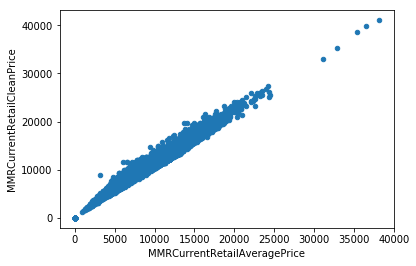

In [5]:
plt.figure(figsize=[16,9], dpi=100)
data.plot.scatter("MMRCurrentRetailAveragePrice", "MMRCurrentRetailCleanPrice")
plt.show()

**It seems that it is linear.**

## 1c)

In [6]:
data.columns

Index(['RT13Id', 'IsBadBuy', 'PurchDate', 'Auction', 'PaintingYear',
       'PaintingAge', 'Artist', 'PaintingName', 'Trim', 'SubType',
       'CanvasColor', 'Market', 'FrameTypeID', 'FrameType', 'Bids',
       'Nationality', 'Size', 'TopThreeNYCName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'PaintingBCost',
       'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [7]:
need_to_plot = ['PaintingAge', 'Bids', 'WarrantyCost', 'PaintingBCost']
def plot_one_distribution(name):
    plt.figure(figsize=(16, 9))
    sns.distplot(data[name].values, bins=128, kde=False, color='g')
    plt.xlabel(name, fontsize=12)
    plt.ylabel('Number', fontsize=12)
    plt.title("{} Histogram".format(name), fontsize=16)
    plt.show()

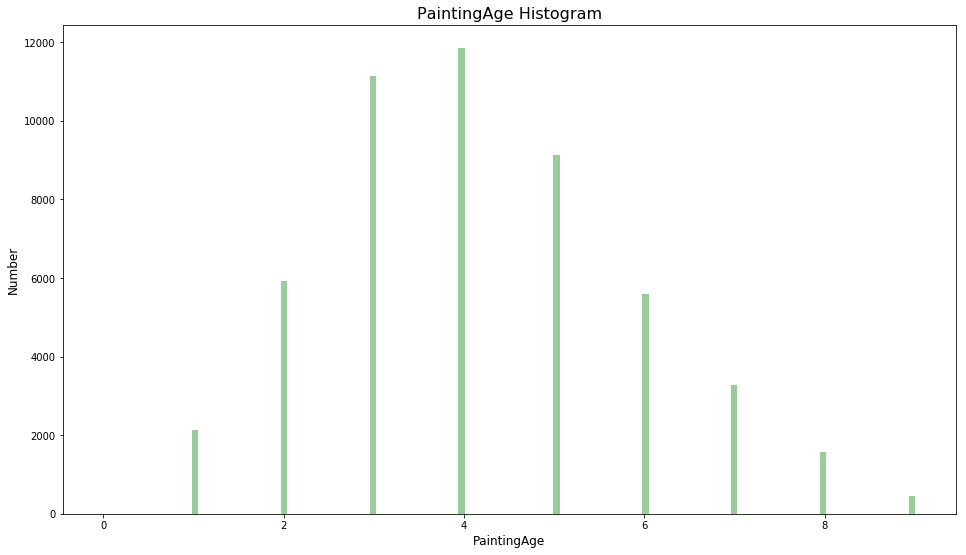

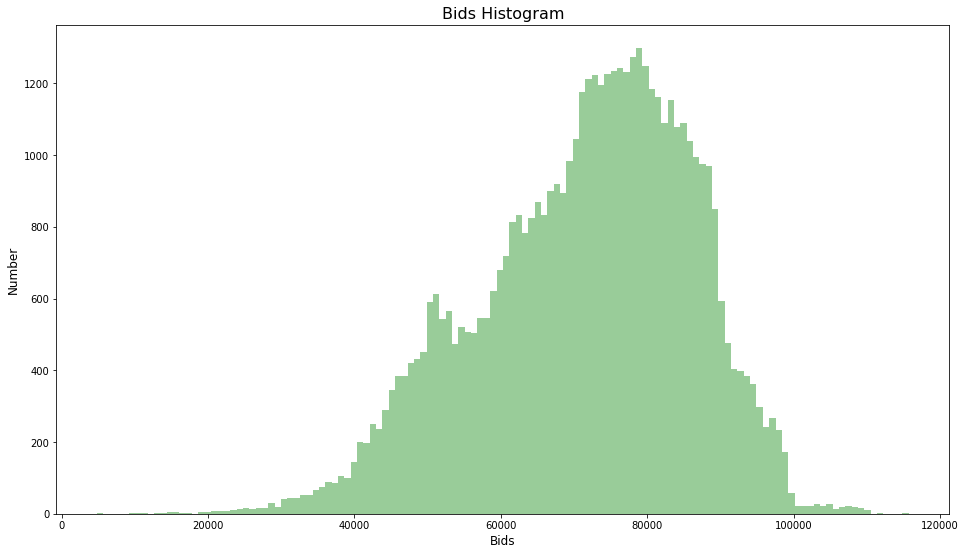

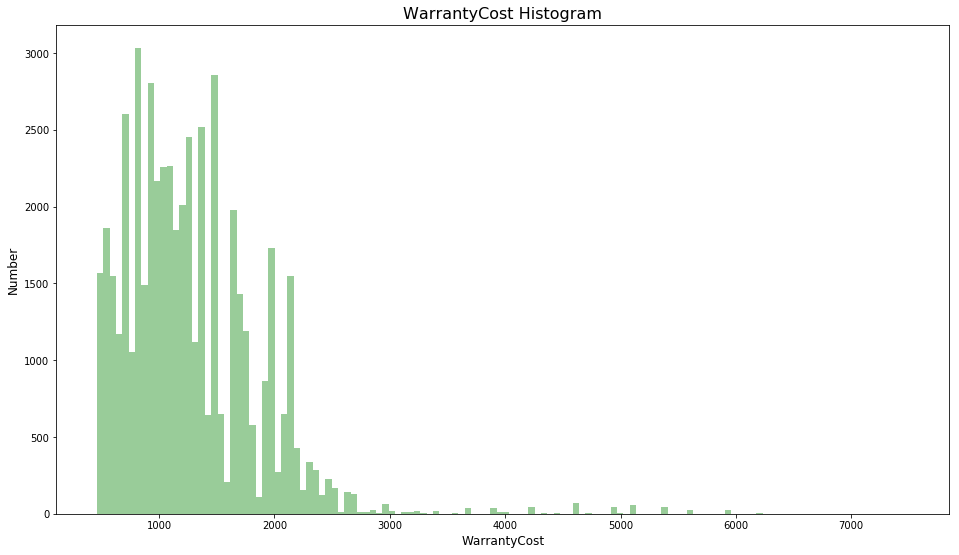

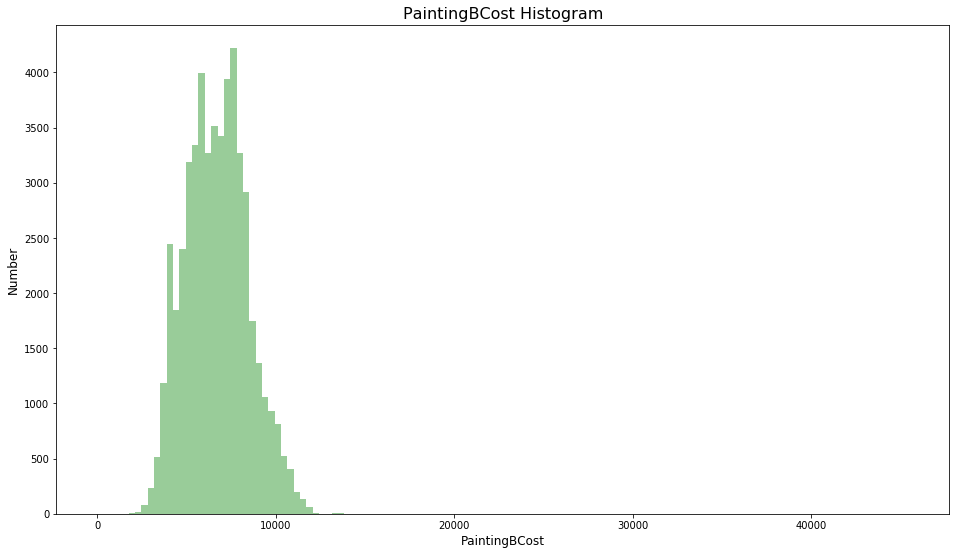

In [8]:
for n in need_to_plot:
    plot_one_distribution(n)

**Basically, all distributions are skewed**

# Question 2

## 2a)

In [9]:
data = data.drop('RT13Id', axis=1)
data.head()

,IsBadBuy,PurchDate,Auction,PaintingYear,PaintingAge,Artist,PaintingName,Trim,SubType,CanvasColor,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,PaintingBCost,IsOnlineSale,WarrantyCost
0,0,4/21/2010,Christie's,2007,3,Cai Jin,TUCSON T2 T7,GLS,4D other,SILVER,...,13641.0,14951.0,NaN,NaN,8655,75236,TX,8160.0,0,920
1,0,4/1/2009,Sotheby's,2004,5,Grandma Moses,Moses T6 3.9L T6 E,Bas,2D Landscape,SILVER,...,6122.0,7474.0,NaN,NaN,22808,71119,LA,6870.0,0,853
2,0,3/31/2010,Christie's,2008,2,Frida Kahlo,AURA T6,XE,4D Genre XE,SILVER,...,13509.0,15918.0,NaN,NaN,20928,32824,FL,8680.0,0,1373
3,1,6/16/2010,Sotheby's,2003,7,Leonardo Da Vinci,MALIBU T6,Bas,4D Genre,GOLD,...,5243.0,6541.0,NaN,NaN,21053,85226,AZ,4830.0,0,2508
4,0,11/4/2010,Sotheby's,2007,3,Leonardo Da Vinci,COBALT,LS,4D Genre LS,RED,...,8228.0,9300.0,NaN,NaN,22916,80817,CO,4965.0,0,671


## 2b)

In [10]:
import re
categories = data[['PaintingName', 'SubType']]

In [11]:
def extract_one_cate(name, subtype, values, idx):
    pattern = re.compile(r"T\d+")
    r1 = pattern.finditer(name)
    for rr in r1:
        values[idx][int(rr.group().replace("T", "")) - 1] = 1
    if not pd.isna(subtype):
        r2 = pattern.finditer(subtype)
        for rr in r2:
            values[idx][int(rr.group().replace("T", "")) - 1] = 1
    if sum(values[idx]) == 0:
        values[idx][-1] = 1
    return

In [12]:
one_hot_values = np.zeros([data.shape[0], 14])
for idx, row in categories.iterrows():
    extract_one_cate(row[0], row[1], one_hot_values, idx)
one_hot_values[:5]

array([[0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [13]:
# the last column means the category T is not given
for i in range(14):
    data["T{}".format(i + 1)] = one_hot_values[:, i]
data.head()

,IsBadBuy,PurchDate,Auction,PaintingYear,PaintingAge,Artist,PaintingName,Trim,SubType,CanvasColor,...,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14
0,0,4/21/2010,Christie's,2007,3,Cai Jin,TUCSON T2 T7,GLS,4D other,SILVER,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,4/1/2009,Sotheby's,2004,5,Grandma Moses,Moses T6 3.9L T6 E,Bas,2D Landscape,SILVER,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,3/31/2010,Christie's,2008,2,Frida Kahlo,AURA T6,XE,4D Genre XE,SILVER,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6/16/2010,Sotheby's,2003,7,Leonardo Da Vinci,MALIBU T6,Bas,4D Genre,GOLD,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,11/4/2010,Sotheby's,2007,3,Leonardo Da Vinci,COBALT,LS,4D Genre LS,RED,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 2c)

In [14]:
def extract_one_num_check(name, values, idx):
    pattern = re.compile(r"I.?\d")
    outpattern = re.compile(r"\d+")
    r = pattern.search(name)
    if r:
        rr = outpattern.search(r.group()).group()
        values[idx] = int(rr)
        return

In [15]:
# 0 here means not given
num_check = np.zeros(data.shape[0])
names = data[['PaintingName']]
for idx, row in names.iterrows():
    extract_one_num_check(row[0], num_check, idx)
num_check[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 4., 0.])

In [16]:
data["num_checked"] = num_check

## 2d)

In [17]:
def extract_one_size(name, values, idx):
    pattern = re.compile(r"\d.?\d?L")
    outpattern = re.compile(r"\d.?\d?")
    r = pattern.search(name)
    if r:
        rr = outpattern.search(r.group()).group()
        values[idx] = float(rr)
        return

In [18]:
# zeros here means not given
sizes = np.zeros(data.shape[0])
names = data[['PaintingName']]
for idx, row in names.iterrows():
    extract_one_size(row[0], sizes, idx)
sizes[:10]

array([0. , 3.9, 0. , 0. , 0. , 0. , 0. , 0. , 2. , 0. ])

In [19]:
data["given_size"] = sizes

## 2e)

In [20]:
_cates = ['Not Given', 'Genre', 'History', 'Still Life', 'Real Life', 'Landscape', 'Portrait', 'Fine Art']
cates_to_id = {v: k for k, v in enumerate(_cates)}
id_to_cates = {k: v for k, v in enumerate(_cates)}

In [21]:
def extract_one_cate_2(subt, _cates, dic, values, idx):
    for c in _cates:
        if  not pd.isna(subt) and subt.find(c) >= 0:
            values[idx] = dic[c]
            return
    return

In [22]:
types = data[['SubType']]
cates_2 = np.zeros(data.shape[0], np.int8)
for idx, row in types.iterrows():
    extract_one_cate_2(row[0], _cates, cates_to_id, cates_2, idx)
print(cates_2[:10])
for t in cates_2[:10]:
    print(id_to_cates[t])

[0 5 1 1 1 1 0 1 1 6]
Not Given
Landscape
Genre
Genre
Genre
Genre
Not Given
Genre
Genre
Portrait


In [23]:
df_tmp = pd.DataFrame({'cate_': [id_to_cates[t] for t in cates_2]})
df_tmp = pd.get_dummies(df_tmp, prefix=['cate_'], drop_first=True)
data = pd.concat([data, df_tmp], axis=1)
data.head()

,IsBadBuy,PurchDate,Auction,PaintingYear,PaintingAge,Artist,PaintingName,Trim,SubType,CanvasColor,...,T14,num_checked,given_size,cate__Genre,cate__History,cate__Landscape,cate__Not Given,cate__Portrait,cate__Real Life,cate__Still Life
0,0,4/21/2010,Christie's,2007,3,Cai Jin,TUCSON T2 T7,GLS,4D other,SILVER,...,0.0,0.0,0.0,0,0,0,1,0,0,0
1,0,4/1/2009,Sotheby's,2004,5,Grandma Moses,Moses T6 3.9L T6 E,Bas,2D Landscape,SILVER,...,0.0,0.0,3.9,0,0,1,0,0,0,0
2,0,3/31/2010,Christie's,2008,2,Frida Kahlo,AURA T6,XE,4D Genre XE,SILVER,...,0.0,0.0,0.0,1,0,0,0,0,0,0
3,1,6/16/2010,Sotheby's,2003,7,Leonardo Da Vinci,MALIBU T6,Bas,4D Genre,GOLD,...,0.0,0.0,0.0,1,0,0,0,0,0,0
4,0,11/4/2010,Sotheby's,2007,3,Leonardo Da Vinci,COBALT,LS,4D Genre LS,RED,...,1.0,0.0,0.0,1,0,0,0,0,0,0


## 2f)

In [24]:
prices = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',]
for p in prices:
    data["{}_ratio".format(p)] = data["Bids"] / data[p]
data.head()

,IsBadBuy,PurchDate,Auction,PaintingYear,PaintingAge,Artist,PaintingName,Trim,SubType,CanvasColor,...,cate__Real Life,cate__Still Life,MMRAcquisitionAuctionAveragePrice_ratio,MMRAcquisitionAuctionCleanPrice_ratio,MMRAcquisitionRetailAveragePrice_ratio,MMRAcquisitonRetailCleanPrice_ratio,MMRCurrentAuctionAveragePrice_ratio,MMRCurrentAuctionCleanPrice_ratio,MMRCurrentRetailAveragePrice_ratio,MMRCurrentRetailCleanPrice_ratio
0,0,4/21/2010,Christie's,2007,3,Cai Jin,TUCSON T2 T7,GLS,4D other,SILVER,...,0,0,8.575855,7.490121,6.209689,5.602900,8.104874,7.167936,5.863720,5.349943
1,0,4/1/2009,Sotheby's,2004,5,Grandma Moses,Moses T6 3.9L T6 E,Bas,2D Landscape,SILVER,...,0,0,15.002756,12.026510,12.803387,10.425124,15.685747,12.646740,13.338778,10.925876
2,0,3/31/2010,Christie's,2008,2,Frida Kahlo,AURA T6,XE,4D Genre XE,SILVER,...,0,0,7.956712,7.132863,6.008796,5.527849,8.233203,7.191053,6.068399,5.150019
3,1,6/16/2010,Sotheby's,2003,7,Leonardo Da Vinci,MALIBU T6,Bas,4D Genre,GOLD,...,0,0,33.343656,23.385822,14.476937,12.280057,33.487689,23.231645,14.786191,11.852010
4,0,11/4/2010,Sotheby's,2007,3,Leonardo Da Vinci,COBALT,LS,4D Genre LS,RED,...,0,0,10.798450,9.091841,6.870934,6.042136,12.008621,10.038778,7.110598,6.290968


## 2g)

In [25]:
factors = ["Artist", "CanvasColor"]
for f in factors:
    df_tmp = data[[f]]
    df_tmp = pd.get_dummies(df_tmp, prefix=[f], drop_first=True)
    data = pd.concat([data, df_tmp], axis=1)
data.head()

,IsBadBuy,PurchDate,Auction,PaintingYear,PaintingAge,Artist,PaintingName,Trim,SubType,CanvasColor,...,CanvasColor_GREY,CanvasColor_MAROON,CanvasColor_NOT AVAIL,CanvasColor_ORANGE,CanvasColor_OTHER,CanvasColor_PURPLE,CanvasColor_RED,CanvasColor_SILVER,CanvasColor_WHITE,CanvasColor_YELLOW
0,0,4/21/2010,Christie's,2007,3,Cai Jin,TUCSON T2 T7,GLS,4D other,SILVER,...,0,0,0,0,0,0,0,1,0,0
1,0,4/1/2009,Sotheby's,2004,5,Grandma Moses,Moses T6 3.9L T6 E,Bas,2D Landscape,SILVER,...,0,0,0,0,0,0,0,1,0,0
2,0,3/31/2010,Christie's,2008,2,Frida Kahlo,AURA T6,XE,4D Genre XE,SILVER,...,0,0,0,0,0,0,0,1,0,0
3,1,6/16/2010,Sotheby's,2003,7,Leonardo Da Vinci,MALIBU T6,Bas,4D Genre,GOLD,...,0,0,0,0,0,0,0,0,0,0
4,0,11/4/2010,Sotheby's,2007,3,Leonardo Da Vinci,COBALT,LS,4D Genre LS,RED,...,0,0,0,0,0,0,1,0,0,0


In [26]:
f = "PaintingYear"
unique_years = list(set(data[f].tolist()))
dic = {v: k for k, v in enumerate(unique_years)}
years = [dic[y] for y in data[f].tolist()]
yys = np.zeros([data.shape[0], len(dic)])
for i, y in enumerate(years):
    yys[i][y] = 1

for i, k in enumerate(dic):
    data[str(k)] = yys[:, i]
data.head()

,IsBadBuy,PurchDate,Auction,PaintingYear,PaintingAge,Artist,PaintingName,Trim,SubType,CanvasColor,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,0,4/21/2010,Christie's,2007,3,Cai Jin,TUCSON T2 T7,GLS,4D other,SILVER,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,4/1/2009,Sotheby's,2004,5,Grandma Moses,Moses T6 3.9L T6 E,Bas,2D Landscape,SILVER,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,3/31/2010,Christie's,2008,2,Frida Kahlo,AURA T6,XE,4D Genre XE,SILVER,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,6/16/2010,Sotheby's,2003,7,Leonardo Da Vinci,MALIBU T6,Bas,4D Genre,GOLD,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,11/4/2010,Sotheby's,2007,3,Leonardo Da Vinci,COBALT,LS,4D Genre LS,RED,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Question 3

In [27]:
# More feature engineering here

In [28]:
def transform(data, _cates, cates_to_id, id_to_cates, unique_years, dic):

    categories = data[['PaintingName', 'SubType']]
    one_hot_values = np.zeros([data.shape[0], 14])
    for idx, row in categories.iterrows():
        extract_one_cate(row[0], row[1], one_hot_values, idx)
    # the last column means the category T is not given
    for i in range(14):
        data["T{}".format(i + 1)] = one_hot_values[:, i]

    # 0 here means not given
    num_check = np.zeros(data.shape[0])
    names = data[['PaintingName']]
    for idx, row in names.iterrows():
        extract_one_num_check(row[0], num_check, idx)

    data["num_checked"] = num_check
    # zeros here means not given
    sizes = np.zeros(data.shape[0])
    names = data[['PaintingName']]
    for idx, row in names.iterrows():
        extract_one_size(row[0], sizes, idx)

    data["given_size"] = sizes
        
    types = data[['SubType']]
    cates_2 = np.zeros(data.shape[0], np.int8)
    for idx, row in types.iterrows():
        extract_one_cate_2(row[0], _cates, cates_to_id, cates_2, idx)
    df_tmp = pd.DataFrame({'cate_': [id_to_cates[t] for t in cates_2]})
    df_tmp = pd.get_dummies(df_tmp, prefix=['cate_'], drop_first=True)
    data = pd.concat([data, df_tmp], axis=1)
    prices = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
           'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
           'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
           'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',]
    for p in prices:
        data["{}_ratio".format(p)] = data["Bids"] / data[p]
        
    f = "PaintingYear"

    years = [dic[y] for y in data[f].tolist()]
    yys = np.zeros([data.shape[0], len(dic)])
    for i, y in enumerate(years):
        yys[i][y] = 1

    for i, k in enumerate(dic):
        data[str(k)] = yys[:, i]
    return data

In [29]:
data.columns.tolist()

['IsBadBuy',
 'PurchDate',
 'Auction',
 'PaintingYear',
 'PaintingAge',
 'Artist',
 'PaintingName',
 'Trim',
 'SubType',
 'CanvasColor',
 'Market',
 'FrameTypeID',
 'FrameType',
 'Bids',
 'Nationality',
 'Size',
 'TopThreeNYCName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'PRIMEUNIT',
 'AUCGUART',
 'BYRNO',
 'VNZIP1',
 'VNST',
 'PaintingBCost',
 'IsOnlineSale',
 'WarrantyCost',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T9',
 'T10',
 'T11',
 'T12',
 'T13',
 'T14',
 'num_checked',
 'given_size',
 'cate__Genre',
 'cate__History',
 'cate__Landscape',
 'cate__Not Given',
 'cate__Portrait',
 'cate__Real Life',
 'cate__Still Life',
 'MMRAcquisitionAuctionAveragePrice_ratio',
 'MMRAcquisitionAuctionCleanPrice_ratio',
 'MMRAcquisitionRetailAverageP

In [30]:
# Using KFold to train multiple models and average the result
test = pd.read_csv("test_dataset.csv")
test = transform(test, _cates, cates_to_id, id_to_cates, unique_years, dic)
test.head()

,RT13Id,PurchDate,Auction,PaintingYear,PaintingAge,Artist,PaintingName,Trim,SubType,CanvasColor,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,1,12/7/2009,Sotheby's,2006,3,Vincent Van Gogh,Vincent Van Gogh3,i,4D Genre I,RED,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,7,12/7/2009,Sotheby's,2004,5,Raphael,SPECTRA,EX,4D Genre EX,BLACK,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,12/7/2009,Sotheby's,2005,4,Grandma Moses,TAURUS,SE,4D Genre SE,WHITE,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,20,12/14/2009,Sotheby's,2004,5,Jean-Michel BasquiatC,ENVOY XL T2 T8,SLE,4D Other 4.2L SLE,BLACK,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21,12/14/2009,Sotheby's,2002,7,Andy Warhol,Soup Cans T4 T6,Bas,Portrait 3.3L,BLUE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
features = [ 'MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',  'PaintingBCost', 
 'WarrantyCost', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'num_checked', 'given_size',
 'cate__Genre', 'cate__History', 'cate__Landscape', 'cate__Not Given', 'cate__Portrait', 'cate__Real Life', 'cate__Still Life', 'MMRAcquisitionAuctionAveragePrice_ratio',
 'MMRAcquisitionAuctionCleanPrice_ratio', 'MMRAcquisitionRetailAveragePrice_ratio', 'MMRAcquisitonRetailCleanPrice_ratio',
 'MMRCurrentAuctionAveragePrice_ratio', 'MMRCurrentAuctionCleanPrice_ratio', 'MMRCurrentRetailAveragePrice_ratio',
 'MMRCurrentRetailCleanPrice_ratio', 'Artist_Boticelli', 'Artist_Bronzio', 'Artist_Buick', 'Artist_Cai Jin', 'Artist_Caravaggio',
 'Artist_Cheng', 'Artist_Claude Monet', 'Artist_El Grecko', 'Artist_Frida Kahlo', 'Artist_Giotto', 'Artist_Giovanni', 'Artist_Grandma Moses',
 'Artist_Jackson Pollock', 'Artist_Jan Van Eyck', 'Artist_Jean-Michel BasquiatC', 'Artist_Leonardo Da Vinci', 'Artist_Lincoln', 'Artist_M F Hussain',
 'Artist_Michael Judd', 'Artist_Michelangelo', 'Artist_Mini', 'Artist_Pablo Picasso', 'Artist_Paul', 'Artist_Paul Klee', 'Artist_Qu Ding', 'Artist_Raphael',
 'Artist_Sohel', 'Artist_Tintorretto', 'Artist_Titian', 'Artist_Vin', 'Artist_Vincent Van Gogh',
 'CanvasColor_BLACK', 'CanvasColor_BLUE', 'CanvasColor_BROWN', 'CanvasColor_GOLD', 'CanvasColor_GREEN', 'CanvasColor_GREY',
 'CanvasColor_MAROON', 'CanvasColor_NOT AVAIL', 'CanvasColor_ORANGE', 'CanvasColor_OTHER', 'CanvasColor_PURPLE', 'CanvasColor_RED',
 'CanvasColor_SILVER', 'CanvasColor_WHITE', 'CanvasColor_YELLOW', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
 '2009', '2010']
x_test = test.loc[:, features]
x_train = data.loc[:, features]
y_train = data[['IsBadBuy']].values.reshape([-1])
x_test.head()

F:\python\Lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PaintingBCost,WarrantyCost,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,7100.0,1113,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2966.0,4038.0,6240.0,8496.0,2980.0,4115.0,6230.0,8603.0,4200.0,533,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3313.0,4342.0,6667.0,7707.0,3713.0,4578.0,6942.0,8242.0,4500.0,825,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7347.0,8845.0,11092.0,13052.0,7436.0,8766.0,11367.0,12609.0,7100.0,1243,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2139.0,3106.0,5072.0,6424.0,3307.0,4388.0,6228.0,7413.0,4800.0,1551,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
x_val, y_val, x_train, y_train = x_train.loc[:100, :], y_train[:100], x_train.loc[100:, :], y_train[100:]

In [46]:
# LGBM feature importance analysis
def lgb_model(x_train, x_test, y_train, y_test):
    params = {
        "objective" : "binary",
        "metric" : "binary_error",
        "num_leaves" : 20,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.8,
        "feature_fraction" : 0.8,
        "bagging_frequency" : 5,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "max_depth" : 6
    }
    train = lgb.Dataset(x_train, label=y_train)
    test = lgb.Dataset(x_test, label=y_test)
    model = lgb.train(params, train, 1000, valid_sets=[test], early_stopping_rounds=300, verbose_eval=200)
    return model

In [47]:
num_kfold = 3
kf = model_selection.KFold(n_splits=num_kfold, shuffle=True, random_state=666)

target = pd.DataFrame(columns=['RT13Id', 'IsBadBuy'])
target['RT13Id'] = test['RT13Id']
target['IsBadBuy'] = 0
for t_idx, v_idx in kf.split(x_train):
    t_x, v_x = x_train.loc[t_idx, :], x_train.loc[v_idx, :]
    t_y, v_y = y_train[t_idx], y_train[v_idx]
    model = lgb_model(t_x, v_x, t_y, v_y)
    target['IsBadBuy'] += model.predict(x_test)

F:\python\Lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Training until validation scores don't improve for 300 rounds.
[200]	valid_0's binary_error: 0.125618
Early stopping, best iteration is:
[1]	valid_0's binary_error: 0.125441
Training until validation scores don't improve for 300 rounds.
[200]	valid_0's binary_error: 0.120734
Early stopping, best iteration is:
[1]	valid_0's binary_error: 0.120675
Training until validation scores don't improve for 300 rounds.
[200]	valid_0's binary_error: 0.123617
Early stopping, best iteration is:
[1]	valid_0's binary_error: 0.123205


In [49]:
target['IsBadBuy'] = round(target['IsBadBuy'] / float(num_kfold), 0)
target.to_csv('submission.csv', index=False)